<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [750]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [751]:
# web location:
local_csv = '../data/NHL_Data_GA.csv'

### 1. Load the NHL data

In [752]:
# A:
df = pd.read_csv(local_csv)

### 2. Perform any required data cleaning. Do some EDA.

In [753]:
# A:
#Check Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    90 non-null     object 
 1   PTS     90 non-null     int64  
 2   Rank    90 non-null     int64  
 3   TOI     90 non-null     object 
 4   GF      90 non-null     int64  
 5   GA      90 non-null     int64  
 6   GF60    90 non-null     float64
 7   GA60    90 non-null     float64
 8   GF%     90 non-null     float64
 9   SF      90 non-null     int64  
 10  SA      90 non-null     int64  
 11  SF60    90 non-null     float64
 12  SA60    90 non-null     float64
 13  SF%     90 non-null     float64
 14  FF      90 non-null     int64  
 15  FA      90 non-null     int64  
 16  FF60    90 non-null     float64
 17  FA60    90 non-null     float64
 18  FF%     90 non-null     float64
 19  CF      90 non-null     int64  
 20  CA      90 non-null     int64  
 21  CF60    90 non-null     float64
 22  CA60

In [754]:
#Shape of the data
df.shape

(90, 28)

In [755]:
#Describe the data
df.describe()

,PTS,Rank,GF,GA,GF60,GA60,GF%,SF,SA,SF60,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,91.977778,2.022222,83.288889,83.288889,2.442222,2.444000,49.981111,1068.333333,1068.333333,31.252222,...,49.966667,1973.466667,1973.466667,57.735556,57.798889,49.972222,7.814556,92.182556,999.988889,990.966667
std,12.524114,0.820767,10.376339,9.694484,0.325331,0.313522,4.644554,95.929047,75.514118,2.237637,...,2.797913,176.468299,154.148928,4.124476,4.291106,2.844313,0.866942,0.928621,12.292772,178.049321
min,62.000000,1.000000,57.000000,64.000000,1.700000,1.730000,38.000000,815.000000,868.000000,25.800000,...,43.100000,1565.000000,1572.000000,49.500000,46.700000,43.700000,5.900000,89.830000,978.000000,689.000000
25%,82.250000,1.000000,76.000000,75.500000,2.232500,2.202500,46.825000,1011.500000,1022.250000,29.550000,...,47.775000,1855.250000,1877.000000,54.275000,54.600000,47.925000,7.235000,91.555000,992.000000,881.250000
50%,92.500000,2.000000,84.000000,84.000000,2.400000,2.495000,49.700000,1072.000000,1072.000000,31.400000,...,50.050000,1981.500000,1961.000000,58.050000,58.350000,50.400000,7.730000,92.250000,1000.500000,960.000000
75%,102.000000,3.000000,90.000000,89.000000,2.600000,2.670000,53.625000,1143.000000,1125.750000,32.775000,...,51.775000,2112.750000,2077.250000,60.850000,60.400000,52.000000,8.270000,92.870000,1007.750000,1101.500000
max,121.000000,3.000000,115.000000,107.000000,3.450000,3.240000,61.200000,1311.000000,1245.000000,35.600000,...,58.100000,2341.000000,2332.000000,64.900000,67.500000,57.100000,10.340000,93.940000,1034.000000,1515.000000


In [756]:
df.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


In [757]:
#Detect any NA value
df.isna().sum()

Team    0
PTS     0
Rank    0
TOI     0
GF      0
GA      0
GF60    0
GA60    0
GF%     0
SF      0
SA      0
SF60    0
SA60    0
SF%     0
FF      0
FA      0
FF60    0
FA60    0
FF%     0
CF      0
CA      0
CF60    0
CA60    0
CF%     0
Sh%     0
Sv%     0
PDO     0
PIM     0
dtype: int64

In [758]:
# No NA Value Detected :)
#Since we need to predict rank We need to check the rank Distribution (KNN need an equally distributed Data!)
df['Rank'].value_counts()

3    31
2    30
1    29
Name: Rank, dtype: int64

<AxesSubplot:>

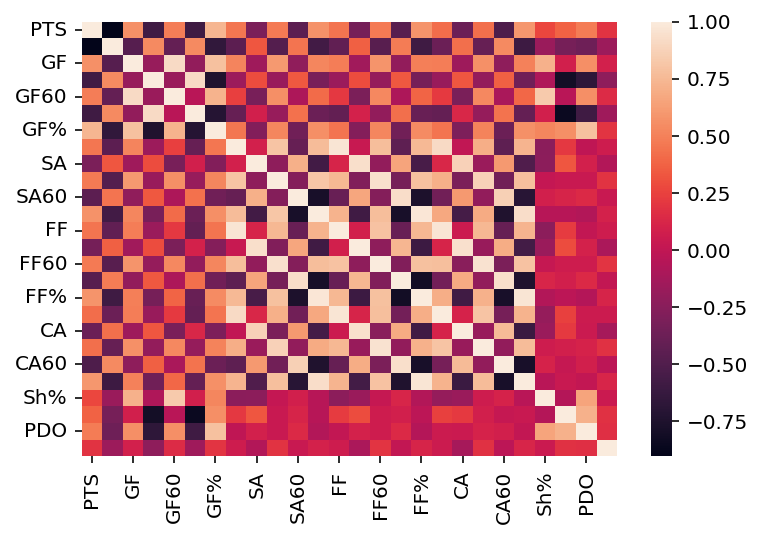

In [759]:
# Data is almost equally distributed among the ranks
#Check Correlation via heatmap
sns.heatmap(df.corr())

In [760]:
# Too many features to look into the heatmap @@
#Check which features have the correlation above 0.5
df_corr = df.corr().transpose()['Rank'].reset_index()
df_corr['Rank'] = np.abs(df_corr['Rank'])
df_corr = df_corr.loc[df_corr['Rank'] > 0.5]
df_corr = df_corr.loc[df_corr['Rank'] < 1] #Remove Correlation 1
df_corr = df_corr.loc[df_corr['Rank'] < 0.9] #Remove Correlation 0.9
df_corr.sort_values(by=['Rank'],ascending = False,inplace=True)
df_corr

,index,Rank
6,GF%,0.653633
21,CF%,0.598466
16,FF%,0.585340
11,SF%,0.577347
20,CA60,0.537879
5,GA60,0.536279
3,GA,0.535782


In [761]:
#Rename the column name..
df_corr.rename(columns={'index':'features','Rank':'correlation'},inplace=True)
df_corr

,features,correlation
6,GF%,0.653633
21,CF%,0.598466
16,FF%,0.585340
11,SF%,0.577347
20,CA60,0.537879
5,GA60,0.536279
3,GA,0.535782


### 3. Set up the `Rank` variable as your target. How many classes are there?

In [762]:
# A:
#Set up X and y
y = df['Rank']

In [763]:
y.value_counts()

3    31
2    30
1    29
Name: Rank, dtype: int64

### 4. What is the baseline accuracy?

In [764]:
# A:
y.value_counts()/y.count()


3    0.344444
2    0.333333
1    0.322222
Name: Rank, dtype: float64

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [765]:
# A:
#We already get the correlation above > 0,5 during the EDA inside df_corr..here are top 4 features that we will pick as X
df_corr.head(4)

,features,correlation
6,GF%,0.653633
21,CF%,0.598466
16,FF%,0.585340
11,SF%,0.577347


array([[<AxesSubplot:title={'center':'CF%'}, xlabel='[Rank]'>,
        <AxesSubplot:title={'center':'FF%'}, xlabel='[Rank]'>],
       [<AxesSubplot:title={'center':'GF%'}, xlabel='[Rank]'>,
        <AxesSubplot:title={'center':'SF%'}, xlabel='[Rank]'>]],
      dtype=object)

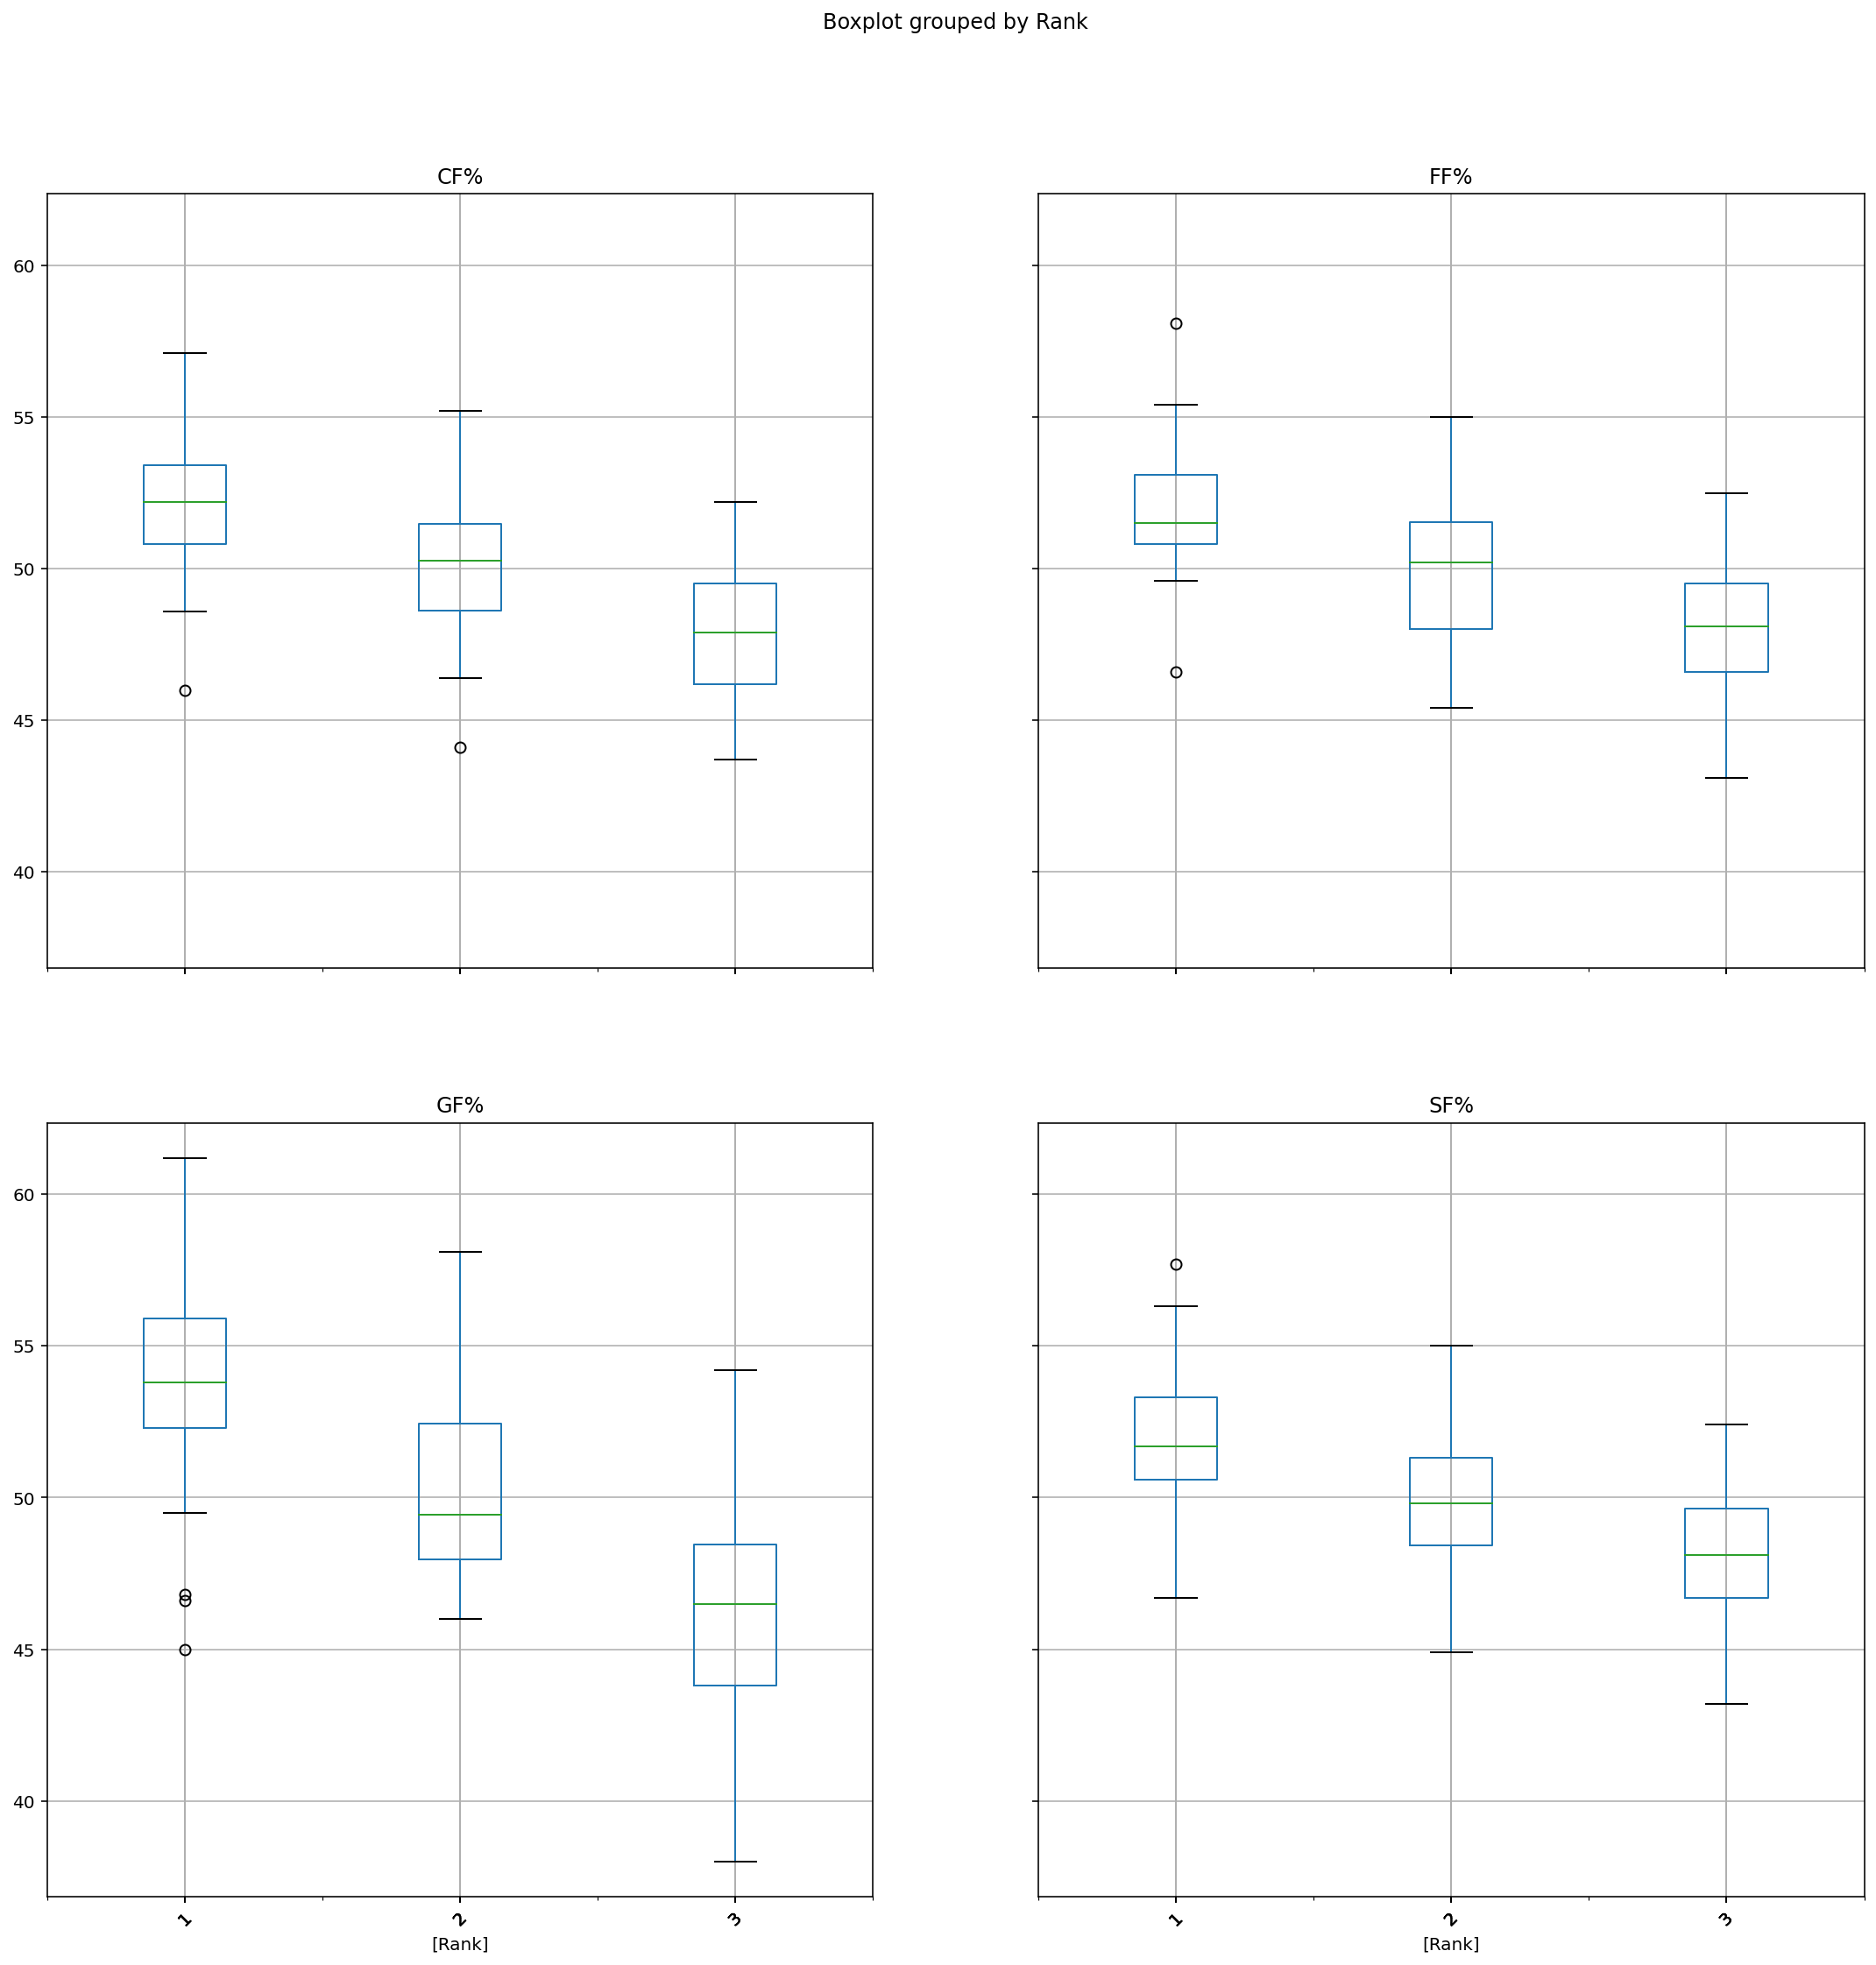

In [766]:
#Do Box Plot
features = df_corr.head(4)['features'].to_list()
features.append('Rank')
df_bx_plt = df[features]
df_bx_plt.boxplot(by='Rank', rot=45, figsize=(18,18))

In [767]:
#Load it into X
X = df[df_corr.head(4)['features'].to_list()]
X

,GF%,CF%,FF%,SF%
0,61.2,52.5,51.3,51.5
1,56.6,53.4,53.1,52.0
2,57.0,51.4,50.9,50.6
3,55.6,57.1,58.1,57.7
4,53.8,52.6,51.0,49.2
...,...,...,...,...
85,44.8,49.4,49.3,49.0
86,48.0,50.9,51.1,50.5
87,48.3,50.8,49.6,50.1
88,40.2,45.1,45.6,46.6


### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [768]:
# A:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X,y)


KNeighborsClassifier(n_neighbors=1)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [769]:
# A:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X)
print(f'Accuracy score : {accuracy_score(y,y_pred)}')

Accuracy score : 1.0


In [770]:
# This is not legitimite...we don't split the data hence it is an Overfitting model.

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [771]:
# A:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state = 123)

In [772]:
X_train.shape

(45, 4)

In [773]:
X_test.shape

(45, 4)

In [774]:
y_train.shape

(45,)

In [775]:
y_test.shape

(45,)

In [776]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [777]:
y_pred = knn.predict(X_test)
print(f'Accuracy score : {accuracy_score(y_test,y_pred)}')

Accuracy score : 0.4888888888888889


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [778]:
# A:
knn = KNeighborsClassifier(n_neighbors = y_train.shape[0])
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(f'Accuracy score : {accuracy_score(y_test,y_pred)}')

Accuracy score : 0.28888888888888886


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

<AxesSubplot:xlabel='neighbor', ylabel='accuracy'>

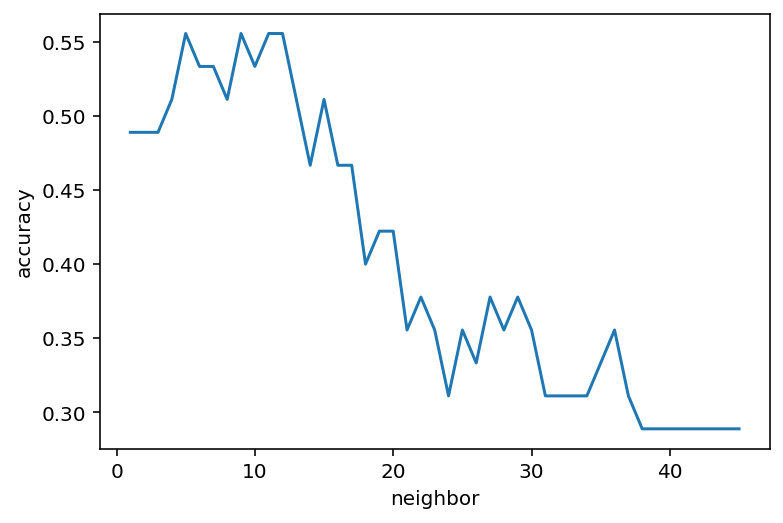

In [779]:
# A:
acc_score = {'neighbor':[], 'accuracy':[]}
for i in range(1,y_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc_score['neighbor'].append(i)
    acc_score['accuracy'].append(accuracy_score(y_test,y_pred))

df_score = pd.DataFrame(acc_score)
df_score.head()
sns.lineplot(data=df_score,x='neighbor',y='accuracy')

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [780]:
# A:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def KFoldTestAccuracy(X,y,label,folds=5):
    acc_score = {'label':[], 'neighbor':[], 'accuracy':[]}
    max_neighbors = np.floor(X.shape[0] - X.shape[0]/5.)
    
    for i in range(1,int(max_neighbors)):
        knn = KNeighborsClassifier(n_neighbors = i)
        acc_score['label'].append(label)
        acc_score['neighbor'].append(i)
        acc_score['accuracy'].append(np.mean(cross_val_score(knn,X, y,scoring = 'accuracy', cv=folds)))
    return pd.DataFrame(acc_score)
  

<AxesSubplot:xlabel='neighbor', ylabel='accuracy'>

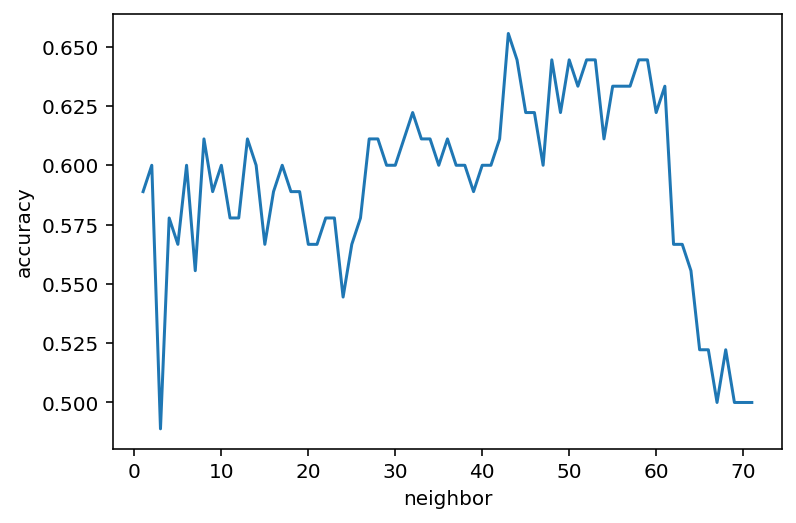

In [781]:
df_res_non_std = KFoldTestAccuracy(X,y,'Non-Standarize')
sns.lineplot(data=df_res_non_std, x='neighbor', y='accuracy')

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

<AxesSubplot:xlabel='neighbor', ylabel='accuracy'>

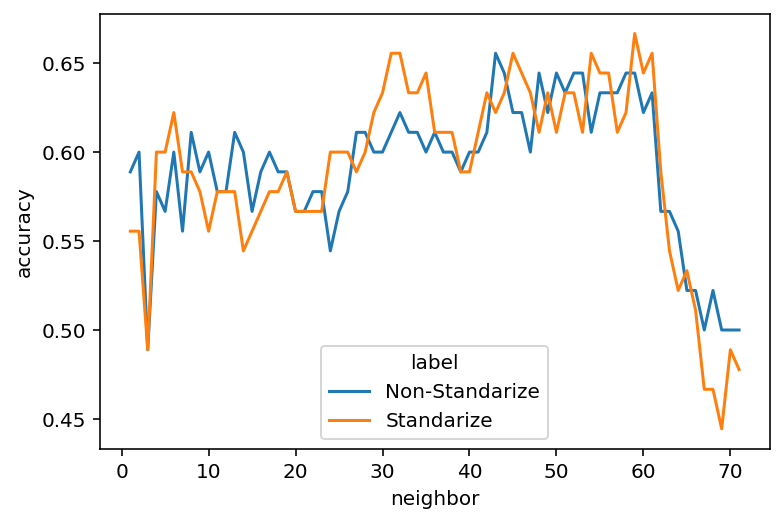

In [782]:
# A:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#Get Standarized Result
df_res_std = KFoldTestAccuracy(X_std,y,'Standarize')
df_res = pd.concat( [df_res_non_std, df_res_std],axis=0, ignore_index=True).reset_index()
sns.lineplot(data=df_res,x='neighbor',y='accuracy',hue='label')

In [783]:
#X_std

In [784]:
# Get the best score accuracy score for Standarized
df_res_std.sort_values(by=['accuracy','neighbor'],ascending=[False,True],inplace=True)
df_res_std.head(1)


,label,neighbor,accuracy
58,Standarize,59,0.666667


In [785]:
# Get the best score accuracy score for Non-Standarized Data
df_res_non_std.sort_values(by=['accuracy','neighbor'],ascending=[False,True],inplace=True)
df_res_non_std.head(1)


,label,neighbor,accuracy
42,Non-Standarize,43,0.655556


### Experiment : Check how number of folds will affect the accuracy

Test Methodology : We use number of neighbor with the best accuracy for each Standarized and Non-Standarized value and iterate each folds from 2 until 30

In [786]:
# Create a function that we can call repeatedly for testing
def KFoldTestFold(X,y,label, neighbor):
    acc_score = {'label':[], 'folds':[], 'accuracy':[]}
    
    for i in range(2,30):
        knn = KNeighborsClassifier(n_neighbors = neighbor)
        acc_score['label'].append(label)
        acc_score['folds'].append(i)
        acc_score['accuracy'].append(np.mean(cross_val_score(knn,X, y,scoring = 'accuracy', cv=i)))
        
    return pd.DataFrame(acc_score)

/Users/arytonchouigen/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/arytonchouigen/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/arytonchouigen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/arytonchouigen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/arytonchouigen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users

<AxesSubplot:xlabel='folds', ylabel='accuracy'>

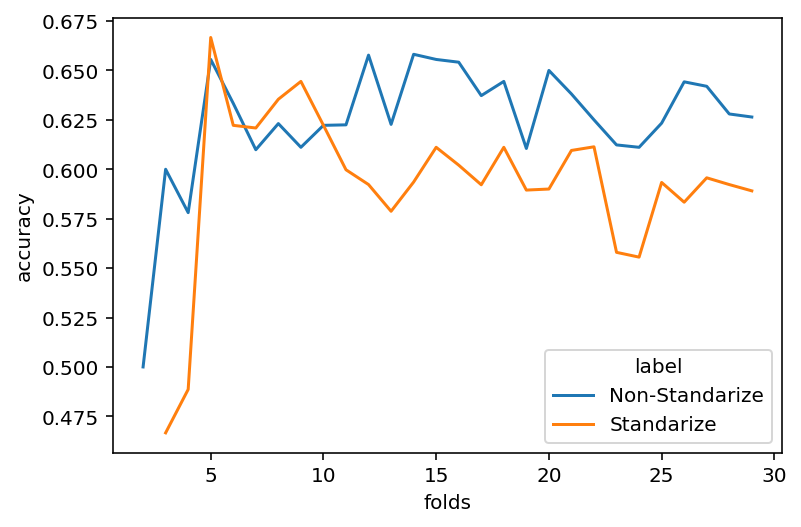

In [787]:
df_res_non_std_f = KFoldTestFold(X,y,'Non-Standarize', int(df_res_non_std.head(1)['neighbor']))
df_res_std_f = KFoldTestFold(X_std,y,'Standarize',int(df_res_std.head(1)['neighbor']))
df_res_f = pd.concat( [df_res_non_std_f, df_res_std_f],axis=0, ignore_index=True).reset_index()
sns.lineplot(data=df_res_f,x='folds',y='accuracy',hue='label')

### Experiment : Get the best out of KNN using GridSearchCV for Hyperparameter tuning

Methodology : Replicate what I did previously for Standarized data to find the best number of neighbours to use for KNN

In [788]:
from sklearn.model_selection import GridSearchCV

max_neighbors = np.floor(X.shape[0] - X.shape[0]/5.)
param = {'n_neighbors':np.arange(1,int(max_neighbors))}
model = KNeighborsClassifier()
knn_gscv = GridSearchCV(model, param, cv=5)
knn_gscv.fit(X_std,y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71])})

In [789]:
knn_gscv.best_params_

{'n_neighbors': 59}

In [790]:
knn_gscv.best_score_

0.6666666666666666

In [791]:
df_corr = df.corr().transpose()['Rank'].reset_index()
df_corr['Rank'] = np.abs(df_corr['Rank'])
df_corr = df_corr.loc[df_corr['Rank'] > 0.5]
df_corr.sort_values(by=['Rank'],ascending = False,inplace=True)
df_corr

,index,Rank
1,Rank,1.000000
0,PTS,0.905004
6,GF%,0.653633
21,CF%,0.598466
16,FF%,0.585340
11,SF%,0.577347
20,CA60,0.537879
5,GA60,0.536279
3,GA,0.535782
